<a href="https://colab.research.google.com/github/Sudorenkoroma/HW_GI_ML/blob/main/Hw2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [ ]:
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"


tables = pd.read_html(url)

df = tables[12]



Виведення перших рядків таблиці

In [ ]:
print(df.head())

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


Виведення кількості рядків та стовпців

In [ ]:
print(df.shape)

(28, 9)


Заміна "—" на NaN

In [ ]:
df.replace("—", np.nan, inplace=True)
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,NaN,NaN
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,NaN
5,Житомирська,261.0,223.0,159.0,129,89,122,120,79
6,Закарпатська,314.0,273.0,207.0,168,115,151,146,104
7,Запорізька,219.0,197.0,150.0,124,71,106,106,68
8,Івано-Франківська,243.0,248.0,182.0,155,103,124,122,88
9,Київська,204.0,189.0,156.0,123,73,122,121,80


Визначення типів стовпці

In [ ]:
print(df.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


Заміна типів нечислових колонок на числові

In [ ]:
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object


Підрахунок частки пропусків у кожній колонці

In [ ]:
print(df.isnull().sum() / len(df))

Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


Видалення даних по всій країні (останній рядок)

In [ ]:
df = df[:-1]
df[-5:]

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
22,Черкаська,205.0,179.0,144.0,123,75,100,98.0,64.0
23,Чернівецька,247.0,218.0,170.0,148,101,128,129.0,92.0
24,Чернігівська,220.0,183.0,127.0,108,69,94,90.0,61.0
25,Київ,NaN,174.0,159.0,120,73,120,121.0,110.0
26,Севастополь,NaN,NaN,NaN,125,70,120,NaN,NaN


Заміна відсутніх даних середніми значеннями

In [ ]:
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x.fillna(x.mean()), axis=0)
df[-5:]

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
22,Черкаська,205.00,179.000000,144.0,123,75,100,98.00,64.000000
23,Чернівецька,247.00,218.000000,170.0,148,101,128,129.00,92.000000
24,Чернігівська,220.00,183.000000,127.0,108,69,94,90.00,61.000000
25,Київ,231.04,174.000000,159.0,120,73,120,121.00,110.000000
26,Севастополь,231.04,207.576923,156.0,125,70,120,111.44,80.173913


Список регіонів з народжуваністю вище середнього у 2019

In [ ]:
average_birthrate_2019 = df['2019'].mean()
regions_above_average = df[df['2019'] > average_birthrate_2019]['Регіон']
regions_above_average

2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object

Регіон з найвищою народжуваністю у 2014

In [ ]:
highest_birthrate_2014_region = df[df['2014'] == df['2014'].max()]['Регіон']
highest_birthrate_2014_region

16    Рівненська
Name: Регіон, dtype: object

<Axes: title={'center': 'Народжуваність по регіонах України у 2019'}, xlabel='Регіон'>

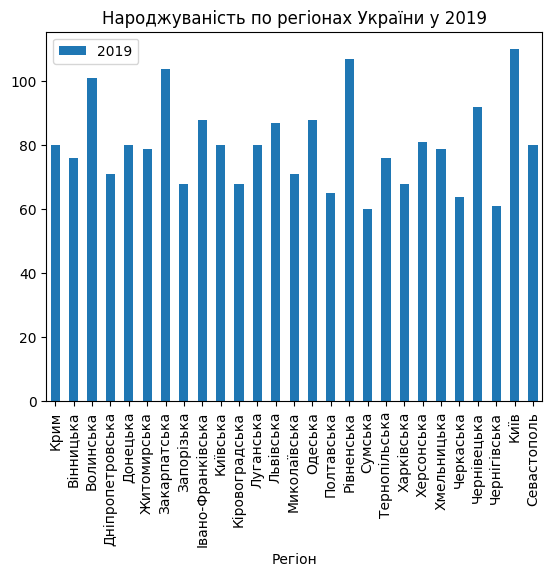

In [ ]:
df.plot(x='Регіон', y='2019', kind='bar', title='Народжуваність по регіонах України у 2019')